# **IMAGE SUPER-RESOLUTION MODEL**

> The code demonstrates the entire workflow of loading an image, preprocessing it to be compatible with the ESRGAN model, generating a high-resolution version of the image, and visualizing the results. This implementation showcases the practical application of deep learning models for image super-resolution tasks.



---



> **Generative AI & Prompt Engineering 2024 Internship**




>**Department of Information Technology**










Importing various libraries used for machine learning, image processing, HTTP requests, and plotting:

**TensorFlow** (tf) and TensorFlow Hub (hub) for building and working with machine learning models.

***OpenCV ***(cv2) for computer vision tasks.
Requests for making HTTP requests.

**NumPy** (np) for numerical operations.

**Matplotlib** (plt) for plotting and visualization.
os for interacting with the operating system.
time for time-related functions.

**Pillow** (PIL) for image manipulation.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"



Now, demonstrating the process of enhancing the resolution of an image using a pre-trained Enhanced Super-Resolution Generative Adversarial Network (ESRGAN) model from TensorFlow Hub:

**Preprocess Image:** Prepare the image by cropping it to the nearest multiple of 4 dimensions and converting it to the appropriate data type for the model.

**Load Model:** Load the ESRGAN model from TensorFlow Hub.

**Apply Super-Resolution:** Use the model to enhance the resolution of the image.

**Display Result:** Plot the original and high-resolution images using Matplotlib.

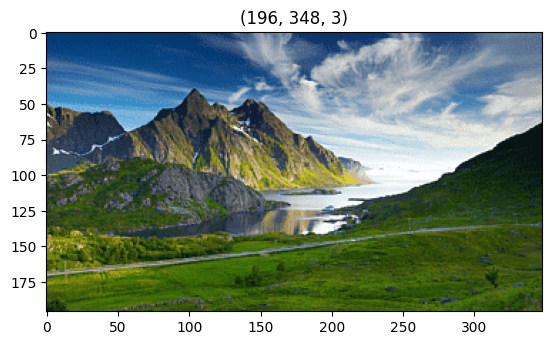

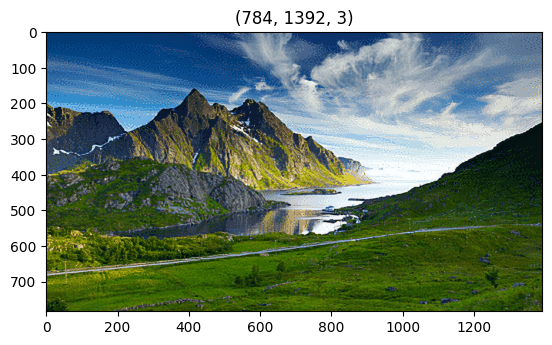

In [ ]:
# Loading the image
img = cv2.imread('image.png')

image_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.title(image_plot.shape)
plt.imshow(image_plot)
plt.show()

def preprocessing(img):
	imageSize = (tf.convert_to_tensor(image_plot.shape[:-1]) // 4) * 4
	cropped_image = tf.image.crop_to_bounding_box(
		img, 0, 0, imageSize[0], imageSize[1])
	preprocessed_image = tf.cast(cropped_image, tf.float32)
	return tf.expand_dims(preprocessed_image, 0)



# The link given here is a model of ESRGAN model
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)

def srmodel(img):
	preprocessed_image = preprocessing(img) # Preprocess the LR Image
	new_image = model(preprocessed_image) # Runs the model
	# returns the size of the original argument that is given as input
	return tf.squeeze(new_image) / 255.0


# Plotting the HR image
hr_image = srmodel(image_plot)
plt.title(hr_image.shape)
plt.imshow(hr_image)
plt.show()




Read an image file, converts it to RGB format, and displays it using Matplotlib.

**Preprocess the Image**: Adjust the image size and format to meet the input requirements of a pre-trained ESRGAN model.

**Load a Pre-Trained Super-Resolution Model:** Retrieve the ESRGAN model from TensorFlow Hub.

**Apply Super-Resolution:** Enhance the resolution of the input image using the ESRGAN model.

**Display the High-Resolution Image:** Show the enhanced image with Matplotlib.

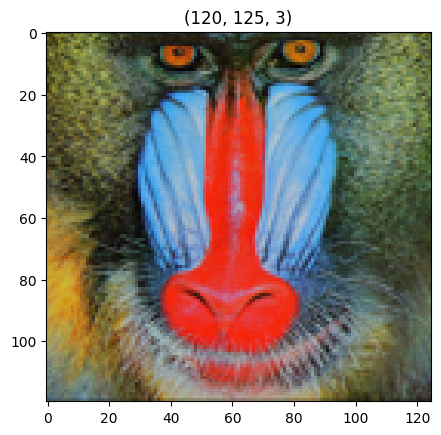

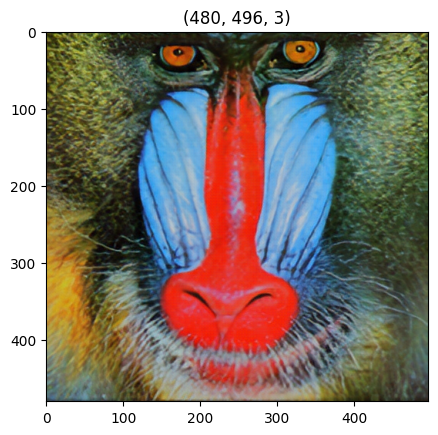

In [ ]:
img = "meerkat.png"

image_plot = cv2.cvtColor(cv2.imdecode(array_img, -1), cv2.COLOR_BGR2RGB)
plt.title(image_plot.shape)
plt.imshow(image_plot)
plt.show()

def preprocessing(img):
	imageSize = (tf.convert_to_tensor(image_plot.shape[:-1]) // 4) * 4
	cropped_image = tf.image.crop_to_bounding_box(
		img, 0, 0, imageSize[0], imageSize[1])
	preprocessed_image = tf.cast(cropped_image, tf.float32)
	return tf.expand_dims(preprocessed_image, 0)

# The link given here is a model of ESRGAN model
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)

def srmodel(img):
	preprocessed_image = preprocessing(img)
	new_image = model(preprocessed_image)

	return tf.squeeze(new_image) / 255.0


# Plot the HR image
hr_image = srmodel(image_plot)
plt.title(hr_image.shape)
plt.imshow(hr_image)
plt.show()
